# 데이터 전처리

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 결측데이터 생성

In [2]:
import pandas as pd
import numpy as np

In [3]:
data=np.random.randn(5,3)
data
df=pd.DataFrame(data,columns=['C1','C2','C3'])
df

,C1,C2,C3
0,1.536833,2.284320,0.492721
1,-2.177351,0.107038,-0.163344
2,1.874731,0.803421,0.489015
3,-0.751226,0.613476,-0.421878
4,-0.236494,0.003680,1.853155


## 결측 데이터를 특정 값으로 채우기

In [4]:
df.loc[2,['C2']]=np.nan  #결측값은 0과 다름 null != 0 
df.loc[3,['C2']]=np.nan

In [5]:
df

,C1,C2,C3
0,1.536833,2.284320,0.492721
1,-2.177351,0.107038,-0.163344
2,1.874731,NaN,0.489015
3,-0.751226,NaN,-0.421878
4,-0.236494,0.003680,1.853155


## 결측 데이터를 평균으로 채우기

In [6]:
# value
#df.fillna(0) #null값을 0값으로 채움.
#평균값을 활용
df.loc[:,['C2']].mean() #시계열데이터의 경우 직전값과 직후값을 사용하는 경우도 O
df.fillna(df.mean()) #원본에 적용되는 것은 아님.
df1 = df.fillna(df.mean()) #이러면 적용

In [7]:
df1

,C1,C2,C3
0,1.536833,2.284320,0.492721
1,-2.177351,0.107038,-0.163344
2,1.874731,0.798346,0.489015
3,-0.751226,0.798346,-0.421878
4,-0.236494,0.003680,1.853155


## 최빈값으로 채우기

In [8]:
# 결측데이터 생성
area=['서울','강원','경기','인천','서울']
df=pd.DataFrame({'지역':area})
df.loc[1] = np.nan
df.loc[3] = np.nan
df

,지역
0,서울
1,NaN
2,경기
3,NaN
4,서울


In [9]:
# 결측 데이터를 최빈값으로 채우기
# mode() == 최빈값 
df['지역'].mode()
df.fillna(df['지역'].mode()[0])

,지역
0,서울
1,서울
2,경기
3,서울
4,서울


## 결측 데이터 처리 예
- [준비파일] : bank.csv

In [10]:
# 결측 데이터 확인
bank = pd.read_csv('/content/drive/MyDrive/data/bank.csv')
bank

,job,education,balance,duration,y
0,management,tertiary,2143,261,no
1,technician,secondary,265,348,no
2,blue-collar,secondary,-7,365,no
3,technician,secondary,-3,1666,no
4,technician,secondary,-103,145,no
...,...,...,...,...,...
7229,services,secondary,199,173,no
7230,self-employed,tertiary,159,449,yes
7231,management,tertiary,138,162,no
7232,management,tertiary,1428,333,no


In [11]:
bank.isnull()

,job,education,balance,duration,y
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
7229,False,False,False,False,False
7230,False,False,False,False,False
7231,False,False,False,False,False
7232,False,False,False,False,False


In [12]:
bank.isnull().sum()

job           44
education    273
balance        0
duration       0
y              0
dtype: int64

In [13]:
# 결측 데이터 행 삭제 후 확인
bank2 = bank.dropna()
bank2.isnull().sum()

job          0
education    0
balance      0
duration     0
y            0
dtype: int64

In [14]:
# 결측 데이터 최빈값으로 대체
m = bank['job'].mode()[0]
bank['job'].fillna(m, inplace = True)
bank.isnull().sum()

job            0
education    273
balance        0
duration       0
y              0
dtype: int64

# 데이터 가공 및 그룹핑

## 엑셀 불러오기
- [준비파일] : weather2020-2021.xlsx

In [15]:
weather = pd.read_excel('/content/drive/MyDrive/data/weather2020-2021.xlsx')
weather.head()

,날짜,평균기온,최저기온,최고기온
0,2020-01-01,-2.2,-6.5,0.3
1,2020-01-02,1.0,-0.7,3.8
2,2020-01-03,-0.1,-3.4,4.6
3,2020-01-04,1.2,-2.8,6.1
4,2020-01-05,1.3,-3.2,6.6


## 컬럼생성

In [16]:
weather['city'] = '서울'
weather

,날짜,평균기온,최저기온,최고기온,city
0,2020-01-01,-2.2,-6.5,0.3,서울
1,2020-01-02,1.0,-0.7,3.8,서울
2,2020-01-03,-0.1,-3.4,4.6,서울
3,2020-01-04,1.2,-2.8,6.1,서울
4,2020-01-05,1.3,-3.2,6.6,서울
...,...,...,...,...,...
726,2021-12-27,-7.6,-12.9,-3.9,서울
727,2021-12-28,-4.1,-8.5,-0.9,서울
728,2021-12-29,0.4,-3.8,5.9,서울
729,2021-12-30,-3.9,-6.8,0.2,서울


## 컬럼 삭제 및 이름변경

In [17]:
weather.drop('city', axis=1)

,날짜,평균기온,최저기온,최고기온
0,2020-01-01,-2.2,-6.5,0.3
1,2020-01-02,1.0,-0.7,3.8
2,2020-01-03,-0.1,-3.4,4.6
3,2020-01-04,1.2,-2.8,6.1
4,2020-01-05,1.3,-3.2,6.6
...,...,...,...,...
726,2021-12-27,-7.6,-12.9,-3.9
727,2021-12-28,-4.1,-8.5,-0.9
728,2021-12-29,0.4,-3.8,5.9
729,2021-12-30,-3.9,-6.8,0.2


In [18]:
weather

,날짜,평균기온,최저기온,최고기온,city
0,2020-01-01,-2.2,-6.5,0.3,서울
1,2020-01-02,1.0,-0.7,3.8,서울
2,2020-01-03,-0.1,-3.4,4.6,서울
3,2020-01-04,1.2,-2.8,6.1,서울
4,2020-01-05,1.3,-3.2,6.6,서울
...,...,...,...,...,...
726,2021-12-27,-7.6,-12.9,-3.9,서울
727,2021-12-28,-4.1,-8.5,-0.9,서울
728,2021-12-29,0.4,-3.8,5.9,서울
729,2021-12-30,-3.9,-6.8,0.2,서울


## 컬럼 이름 변경

In [19]:
weather.rename(columns={'city':'지역'}, inplace = True)
weather

,날짜,평균기온,최저기온,최고기온,지역
0,2020-01-01,-2.2,-6.5,0.3,서울
1,2020-01-02,1.0,-0.7,3.8,서울
2,2020-01-03,-0.1,-3.4,4.6,서울
3,2020-01-04,1.2,-2.8,6.1,서울
4,2020-01-05,1.3,-3.2,6.6,서울
...,...,...,...,...,...
726,2021-12-27,-7.6,-12.9,-3.9,서울
727,2021-12-28,-4.1,-8.5,-0.9,서울
728,2021-12-29,0.4,-3.8,5.9,서울
729,2021-12-30,-3.9,-6.8,0.2,서울


## 날짜형식 데이터 추출

In [20]:
# 데이터타입 조회
weather.dtypes

날짜      datetime64[ns]
평균기온           float64
최저기온           float64
최고기온           float64
지역              object
dtype: object

In [21]:
weather['날짜'].dt.year
weather['날짜'].dt.month
weather['날짜'].dt.day
weather['년도'] = weather['날짜'].dt.year
weather['월'] = weather['날짜'].dt.month
weather['일'] = weather['날짜'].dt.day
weather

,날짜,평균기온,최저기온,최고기온,지역,년도,월,일
0,2020-01-01,-2.2,-6.5,0.3,서울,2020,1,1
1,2020-01-02,1.0,-0.7,3.8,서울,2020,1,2
2,2020-01-03,-0.1,-3.4,4.6,서울,2020,1,3
3,2020-01-04,1.2,-2.8,6.1,서울,2020,1,4
4,2020-01-05,1.3,-3.2,6.6,서울,2020,1,5
...,...,...,...,...,...,...,...,...
726,2021-12-27,-7.6,-12.9,-3.9,서울,2021,12,27
727,2021-12-28,-4.1,-8.5,-0.9,서울,2021,12,28
728,2021-12-29,0.4,-3.8,5.9,서울,2021,12,29
729,2021-12-30,-3.9,-6.8,0.2,서울,2021,12,30


In [22]:
# 응용문제 : 월별 최저기온, 최고기온 평균 출력


## 데이터 병합
- [준비파일] : nation.xslx, code.xslx
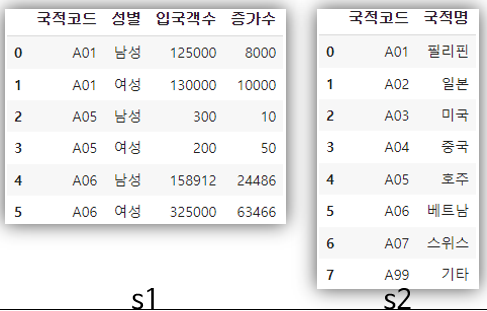

In [23]:
s1 = pd.read_excel('/content/drive/MyDrive/data/nation.xlsx')
s2 = pd.read_excel('/content/drive/MyDrive/data/code.xlsx')

In [24]:
# 공통컬럼을 기준으로 데이터 병합
nation = pd.merge(s1,s2,on = '국적코드')           # how = 'inner' default값이고 동등조인
nation

,국적코드,성별,입국객수,증가수,국적명
0,A01,남성,125000,8000,필리핀
1,A01,여성,130000,10000,필리핀
2,A05,남성,300,10,호주
3,A05,여성,200,50,호주
4,A06,남성,158912,24486,베트남
5,A06,여성,325000,63466,베트남


In [25]:
# left 기준
pd.merge(s1,s2, how = 'left', on = '국적코드')

,국적코드,성별,입국객수,증가수,국적명
0,A01,남성,125000,8000,필리핀
1,A01,여성,130000,10000,필리핀
2,A05,남성,300,10,호주
3,A05,여성,200,50,호주
4,A06,남성,158912,24486,베트남
5,A06,여성,325000,63466,베트남


In [26]:
# right 기준
pd.merge(s1,s2, how = 'right', on = '국적코드')

,국적코드,성별,입국객수,증가수,국적명
0,A01,남성,125000.0,8000.0,필리핀
1,A01,여성,130000.0,10000.0,필리핀
2,A02,NaN,NaN,NaN,일본
3,A03,NaN,NaN,NaN,미국
4,A04,NaN,NaN,NaN,중국
5,A05,남성,300.0,10.0,호주
6,A05,여성,200.0,50.0,호주
7,A06,남성,158912.0,24486.0,베트남
8,A06,여성,325000.0,63466.0,베트남
9,A07,NaN,NaN,NaN,스위스


In [27]:
# 컬럼명이 다를 경우
# pd.merge(s1,s2,left_on='국적코드',right_on='코드') #직접지정

In [28]:
# 데이터 저장하기
# 파일경로
filename = '/content/drive/MyDrive/data/sample.xlsx'
nation.to_excel(filename) #,index=False 로 하면 index 저장안됨.

In [29]:
# 데이터 저장하기


## 데이터 그룹핑

In [30]:
# 한 컬럼 기준 그룹화
s1.groupby('국적코드').sum()

,입국객수,증가수
국적코드,,
A01,255000,18000
A05,500,60
A06,483912,87952


In [31]:
# 여러 컬럼 기준 그룹화
s1.groupby(['국적코드','성별']).sum()

입국객수    증가수
국적코드 성별               
A01  남성  125000   8000
     여성  130000  10000
A05  남성     300     10
     여성     200     50
A06  남성  158912  24486
     여성  325000  63466

# 실습문제
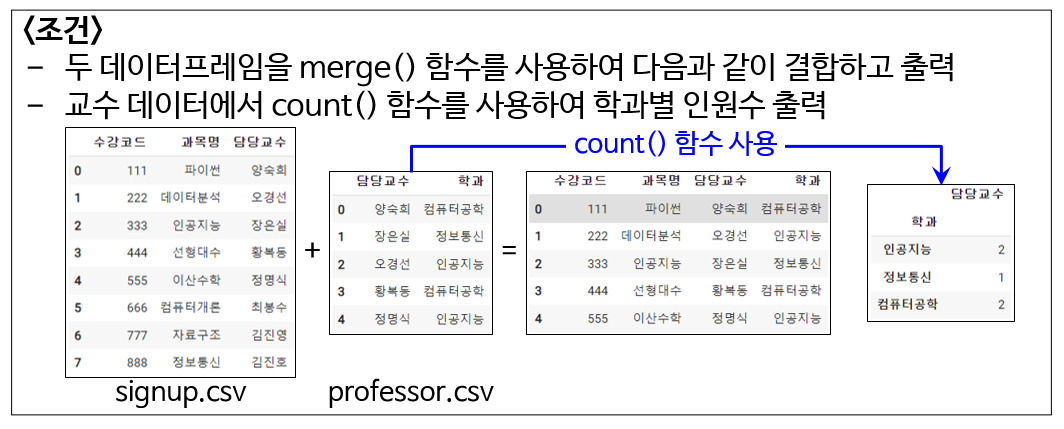

In [32]:
m1 = pd.read_csv('/content/drive/MyDrive/data/signup.csv', encoding = 'cp949')
m2 = pd.read_csv('/content/drive/MyDrive/data/professor.csv', encoding = 'cp949')

In [34]:
pd.merge(m1,m2)

,수강코드,과목명,담당교수,학과
0,111,파이썬,양숙희,컴퓨터공학
1,222,데이터분석,오경선,인공지능
2,333,인공지능,장은실,정보통신
3,444,선형대수,황복동,컴퓨터공학
4,555,이산수학,정명식,인공지능


In [36]:
# 데이터 병합
merge1 = pd.merge(m1,m2, on = '담당교수')
merge1

,수강코드,과목명,담당교수,학과
0,111,파이썬,양숙희,컴퓨터공학
1,222,데이터분석,오경선,인공지능
2,333,인공지능,장은실,정보통신
3,444,선형대수,황복동,컴퓨터공학
4,555,이산수학,정명식,인공지능


In [37]:
merge1.groupby('학과')['담당교수'].count()

학과
인공지능     2
정보통신     1
컴퓨터공학    2
Name: 담당교수, dtype: int64

# 응용문제1
[코로나 이후 국민들의 매체기기 이용량 변화]에 대한 정보가 있는 데이터 파일 (covid.csv)을  이용하여 다음 작업을 수행해 보시오.

<조건>
 － csv 파일을 불러와서 데이터 확인  
 － 사례수가 가장 높은 항목의 모든 정보 출력 
 － 증가율이 높은 3개의 항목 출력



In [39]:
#csv파일 불러와서 데이터 확인
covid = pd.read_csv('/content/drive/MyDrive/data/covid.csv', encoding='cp949')

In [41]:
covid

,항목,사례수,증가,감소,변화없음
0,스마트폰,999,78.9,1.7,19.4
1,텔레비전,965,68.5,3.9,27.6
2,개인용 PC,973,65.7,3.7,30.6
3,태블릿 PC,662,46.8,4.2,49.0
4,라디오,687,35.5,12.5,52.0
5,잡지·책,776,31.3,17.8,50.9
6,종이신문,552,17.6,23.2,59.2


In [48]:
# 사례수가 가장 높은 항목의 모든 정보 출력
covid.sort_values('사례수', ascending=False).loc[0]

항목      스마트폰
사례수      999
증가      78.9
감소       1.7
변화없음    19.4
Name: 0, dtype: object

In [51]:
# 증가율이 높은 3개의 항목 출력
covid.sort_values('증가', ascending=False).loc[0:2]

,항목,사례수,증가,감소,변화없음
0,스마트폰,999,78.9,1.7,19.4
1,텔레비전,965,68.5,3.9,27.6
2,개인용 PC,973,65.7,3.7,30.6


# 응용문제2

In [101]:
#csv파일 불러와서 데이터 확인
vaccine = pd.read_csv('/content/drive/MyDrive/data/vaccine.csv', encoding='cp949')

In [102]:
vaccine

,date,subject,day1num,day1sum,day1rate,day2num,day2sum,day2rate
0,2021.10.16,9505868,10673,7562283,79.6,66910,6191341,65.1
1,2021.10.15,9505868,14556,7551829,79.4,133580,6124432,64.4
2,2021.10.14,9505868,9609,7536654,79.3,94569,5989111,63.0
3,2021.10.13,9505868,9804,7526430,79.2,77503,5893191,62.0
4,2021.10.12,9505868,17274,7516070,79.1,110204,5814018,61.2
...,...,...,...,...,...,...,...,...
174,2021.04.25,1023346,23323,350631,34.2,3411,18513,1.8
175,2021.04.24,1023346,200,350427,34.2,0,18513,1.8
176,2021.04.23,1027740,10195,345764,33.6,119,18376,1.8
177,2021.04.22,1023538,27074,317386,31.0,2479,15901,1.6


In [103]:
# csv 파일을 불러와서 하위 5행의 데이터 확인
vaccine.tail()  #default 값이 하위 5행.

,date,subject,day1num,day1sum,day1rate,day2num,day2sum,day2rate
174,2021.04.25,1023346,23323,350631,34.2,3411,18513,1.8
175,2021.04.24,1023346,200,350427,34.2,0,18513,1.8
176,2021.04.23,1027740,10195,345764,33.6,119,18376,1.8
177,2021.04.22,1023538,27074,317386,31.0,2479,15901,1.6
178,2021.04.21,1019322,22501,291857,28.6,2358,13543,1.3


In [104]:
# 필요 없는 칼럼을 삭제한 후 출력
# (삭제 칼럼 :day1sum,day1rate, day2sum,day2rate)
vaccine.drop(['day1sum','day1rate','day2sum','day2rate'], axis=1, inplace=True)
vaccine

,date,subject,day1num,day2num
0,2021.10.16,9505868,10673,66910
1,2021.10.15,9505868,14556,133580
2,2021.10.14,9505868,9609,94569
3,2021.10.13,9505868,9804,77503
4,2021.10.12,9505868,17274,110204
...,...,...,...,...
174,2021.04.25,1023346,23323,3411
175,2021.04.24,1023346,200,0
176,2021.04.23,1027740,10195,119
177,2021.04.22,1023538,27074,2479


In [105]:
# 데이터프레임의 기초 통계량 확인
vaccine.describe()

,subject,day1num,day2num
count,1.790000e+02,179.000000,179.000000
mean,5.086644e+06,40078.150838,34096.636872
std,3.324235e+06,44231.469656,40745.688278
min,1.019322e+06,0.000000,0.000000
25%,2.279241e+06,4385.000000,4794.500000
50%,3.943320e+06,23323.000000,16581.000000
75%,9.505868e+06,71634.500000,50950.000000
max,9.795426e+06,169036.000000,200186.000000


In [106]:
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     179 non-null    object
 1   subject  179 non-null    int64 
 2   day1num  179 non-null    int64 
 3   day2num  179 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.7+ KB


In [107]:
# 접종일의 '월'로 새로운 열(‘month’) 생성 후 월별 평균 출력
datetime = pd.to_datetime(vaccine['date']) #datetime으로 변경
del vaccine['date']                        # 기존 date 칼럼 삭제
new_vaccine = pd.concat([vaccine, datetime], axis = 1) #datetime 타입으로 변경한 칼럼 concat
new_vaccine

,subject,day1num,day2num,date
0,9505868,10673,66910,2021-10-16
1,9505868,14556,133580,2021-10-15
2,9505868,9609,94569,2021-10-14
3,9505868,9804,77503,2021-10-13
4,9505868,17274,110204,2021-10-12
...,...,...,...,...
174,1023346,23323,3411,2021-04-25
175,1023346,200,0,2021-04-24
176,1027740,10195,119,2021-04-23
177,1023538,27074,2479,2021-04-22


In [110]:
new_vaccine['month'] = new_vaccine['date'].dt.strftime('%m') # 월 칼럼 생성
new_vaccine

,subject,day1num,day2num,date,month
0,9505868,10673,66910,2021-10-16,10
1,9505868,14556,133580,2021-10-15,10
2,9505868,9609,94569,2021-10-14,10
3,9505868,9804,77503,2021-10-13,10
4,9505868,17274,110204,2021-10-12,10
...,...,...,...,...,...
174,1023346,23323,3411,2021-04-25,04
175,1023346,200,0,2021-04-24,04
176,1027740,10195,119,2021-04-23,04
177,1023538,27074,2479,2021-04-22,04


In [112]:
# 월별 하루 1차 접종자수 평균
new_vaccine.groupby(['month'])['day1num'].mean()

month
04    22060.100000
05    18225.548387
06    55957.200000
07    25807.870968
08    57667.258065
09    65715.000000
10     9406.312500
Name: day1num, dtype: float64

In [113]:
# 월별 하루 2차 접종자수 평균
new_vaccine.groupby(['month'])['day2num'].mean()

month
04     2304.600000
05     9734.000000
06    20147.300000
07     9934.903226
08    55575.000000
09    62162.000000
10    79900.750000
Name: day2num, dtype: float64